The dataset is on Kenya's average Monthly Price of Food Crops Commodities 
Scheduled Horticultural Crops between 2012 to 2015.The task is to be able to predict crop prices using the data features available for market insight and aslso planning purposes. 

The particular outcome that we want to be able to predict is of continous nature (crop prices) hence the the algorithms used include Linear Regression,Decion Tree Regression,Random Forest Regression.

# Share your feedback and also UPVOTE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import OrdinalEncoder

### Import and load dataset

In [2]:
data=pd.read_csv("Prices for Food Crops_Commodities_2012_to_2015.csv")

### Summary of our data after loading

In [3]:
data

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4
...,...,...,...,...,...,...,...
1140,Legumes,Groundnuts,Bag,110,KES12986.00,12/25/2015 12:00:00 AM,1140
1141,Roots & Tubers,Red Irish Potatoes,Bag,110,KES2805.00,12/25/2015 12:00:00 AM,1141
1142,Roots & Tubers,White Irish Potatoes,Bag,110,KES2885.00,12/25/2015 12:00:00 AM,1142
1143,Roots & Tubers,Cassava Fresh,Bag,99,KES2097.00,12/25/2015 12:00:00 AM,1143


In [4]:
#getting a summary of the first 5 rows of our dataset.
data.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


In [5]:
#getting a summary of the last  5 rows of our dataset
#You can specify if you want more rows by specifying a number inside the .head() or .tail()
data.tail()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
1140,Legumes,Groundnuts,Bag,110,KES12986.00,12/25/2015 12:00:00 AM,1140
1141,Roots & Tubers,Red Irish Potatoes,Bag,110,KES2805.00,12/25/2015 12:00:00 AM,1141
1142,Roots & Tubers,White Irish Potatoes,Bag,110,KES2885.00,12/25/2015 12:00:00 AM,1142
1143,Roots & Tubers,Cassava Fresh,Bag,99,KES2097.00,12/25/2015 12:00:00 AM,1143
1144,Roots & Tubers,Sweet Potatoes,Bag,98,KES3067.00,12/25/2015 12:00:00 AM,1144


In [6]:
#remove OBJECTID column we don't need it in our dataset as it's not a feature basis for price prediction
data.drop('OBJECTID',inplace=True,axis=1)


#### Check for missing values

In [7]:
#find missing values in columns cumulativey
data.isna().sum()
#filter rows with null data values
null_data=data.isna()
row_null_data=null_data.any(axis=1)
data[row_null_data]


,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
978,Legumes,Groundnuts,Bag,110,NaN,03/01/2015 12:00:00 AM
996,Legumes,Groundnuts,Bag,110,NaN,04/01/2015 12:00:00 AM


Our data has two rows that have missing values all of which fall under the Values_in_Ksh column 
    we shall replace the null values with the mean of the values in that column.

#### Check for Duplicates

In [8]:
#Our data has no Duplicates as it returns false 
data = data.drop_duplicates() 
data.duplicated().values.any()

False

In [9]:
#Checking the shape of our data interms of rows and column numbers
#The Datas is spread across 1145 rows and 6 columns that signify the various attributes
data.shape

(1145, 6)

#### Check the data types in our dataset

In [10]:
data.dtypes

Produce_Variety    object
Commodity_Type     object
Unit               object
Volume_in_Kgs       int64
Values_in_Ksh      object
Date               object
dtype: object

Currently the data has only one integer data type to be able to work with the values_in_ksh,Date and Unit columns we shall need to 
convert them to float,data_time,and integer data types repectively

In [11]:
#Which it the most common type weight in Kgs that the commodities are packaged in and how it varies across our data
data['Volume_in_Kgs'].value_counts()

90     295
13      93
50      93
110     72
126     62
51      55
142     31
38      31
64      31
44      31
39      31
22      31
57      31
93      31
95      31
25      31
54      31
138     31
14      31
115     24
99      24
98      24
Name: Volume_in_Kgs, dtype: int64

Most of the crop commodities sold are packaged in weight of 90Kg

In [12]:
#Finding the packaging  with the highest Unit in Kgs and the variation accross our data

data['Unit'].value_counts()

Bag          780
Ext Bag       86
Med Bunch     62
Lg Box        62
net           62
crate         31
Sm Basket     31
Dozen         31
Name: Unit, dtype: int64

Most of the commodity types sold in the market are packaged in Bags

In [13]:
#Finding the total count of values in Produce Variety Column
data['Produce_Variety'].value_counts()


Horticulture      713
Legumes           216
Cereals           120
Roots & Tubers     96
Name: Produce_Variety, dtype: int64

Horticultural crop products are the ones that are sold most

### Feature Engineering

It involves manipulating the data fields in ways that can help fit our model better and improve it’s accuracy.

    When it comes to  regression analysis, all data fields should be continuous. 
    If there are incompatible data types, one needs to either convert them or drop them
    especially when they don’t contribute much to the desired output.
    
    For the days of the week, assign them respective dummy values.
    
    If the data is ordinal (first, second, third…), convert it to continuous

In [14]:
#using ordinal encoder to encode categorical values into numeric
#We use this categorical data encoding technique when the categorical feature is ordinal. 
#In this case, retaining the order is important. Hence encoding should reflect the sequence.
ord_enc = OrdinalEncoder()
data['produce_variety']=ord_enc.fit_transform(data[['Produce_Variety']]).astype(int)
data['Type_of_Commodity']=ord_enc.fit_transform(data[['Commodity_Type']]).astype(int)
data['Package_Type']=ord_enc.fit_transform(data[['Unit']]).astype(int).astype(int)
#create package_weight column
data['package_weight(Kg)']=data['Volume_in_Kgs']

In [15]:
#create day ,month and year columns
data['Date']=data['Date'].apply(lambda x: x.split(' ')[0])
data['Day']=data['Date'].apply(lambda x: x.split('/')[1]).astype(int)
data['Month']=data['Date'].apply(lambda x: x.split('/')[0]).astype(int)
data['Year']=data['Date'].apply(lambda x: x.split('/')[2]).astype(int)


In [16]:
#remove Kes in the Value_in_Ksh column values which is part of data cleaning to better utilised the values
#This is  our target value bets practice placedm as the last column in our dataset. 
data['Price']=data['Values_in_Ksh'].str.replace('KES'," ").replace(" "," ").astype(float)
data.isna().sum()

Produce_Variety       0
Commodity_Type        0
Unit                  0
Volume_in_Kgs         0
Values_in_Ksh         2
Date                  0
produce_variety       0
Type_of_Commodity     0
Package_Type          0
package_weight(Kg)    0
Day                   0
Month                 0
Year                  0
Price                 2
dtype: int64

#### Replacing missing  values

In [17]:
#the NAN values in Price column 
data.isna().sum()
#replace them with mean of that column so that we don't have NAN values in our dataset
data['Price']=data['Price'].fillna((data['Price'].mean()))


In [18]:
#getting a statistical  overview of the data
data.describe()

,Volume_in_Kgs,produce_variety,Type_of_Commodity,Package_Type,package_weight(Kg),Day,Month,Year,Price
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,73.370306,1.251528,20.024454,1.233188,73.370306,2.886463,6.148472,2013.417467,3188.371829
std,36.564162,0.752362,11.773552,2.114043,36.564162,6.461643,3.401301,1.176864,2376.371660
min,13.000000,0.000000,0.000000,0.000000,13.000000,1.000000,1.000000,2012.000000,443.000000
25%,50.000000,1.000000,10.000000,0.000000,50.000000,1.000000,3.000000,2013.000000,1720.000000
50%,90.000000,1.000000,21.000000,0.000000,90.000000,1.000000,6.000000,2013.000000,2610.000000
75%,95.000000,2.000000,30.000000,2.000000,95.000000,1.000000,9.000000,2015.000000,3776.000000
max,142.000000,3.000000,40.000000,7.000000,142.000000,25.000000,12.000000,2015.000000,13713.000000


In [19]:
#This shows the information concerning our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 0 to 1144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Produce_Variety     1145 non-null   object 
 1   Commodity_Type      1145 non-null   object 
 2   Unit                1145 non-null   object 
 3   Volume_in_Kgs       1145 non-null   int64  
 4   Values_in_Ksh       1143 non-null   object 
 5   Date                1145 non-null   object 
 6   produce_variety     1145 non-null   int32  
 7   Type_of_Commodity   1145 non-null   int32  
 8   Package_Type        1145 non-null   int32  
 9   package_weight(Kg)  1145 non-null   int64  
 10  Day                 1145 non-null   int32  
 11  Month               1145 non-null   int32  
 12  Year                1145 non-null   int32  
 13  Price               1145 non-null   float64
dtypes: float64(1), int32(6), int64(2), object(5)
memory usage: 107.3+ KB


In [20]:
#Getting to see all the column names  in our dataset
data.columns


Index(['Produce_Variety', 'Commodity_Type', 'Unit', 'Volume_in_Kgs',
       'Values_in_Ksh', 'Date', 'produce_variety', 'Type_of_Commodity',
       'Package_Type', 'package_weight(Kg)', 'Day', 'Month', 'Year', 'Price'],
      dtype='object')

### Data Visualization
In data visualization it helps us gain insight into the overall impact of one feature on another.

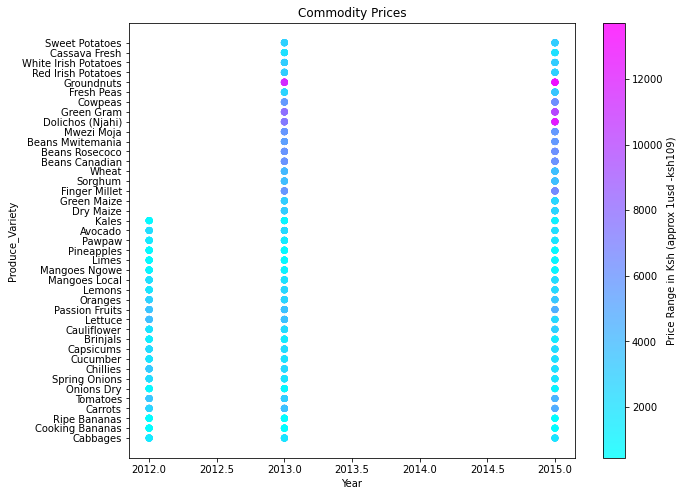

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(data['Year'],data['Commodity_Type'],c=data['Price'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Price Range in Ksh (approx 1usd -ksh109)")
plt.title('Commodity Prices')
plt.xlabel('Year')
plt.ylabel('Produce_Variety')
plt.show()

    From our scatter plot Most produce variety were sold in 2013 and 2015 compare to 2012. 
    Groundnuts,green grams,Dolichos(Njahi) and Beans of type(mwetemania ) among the crops       that fetched a high price of above ksh10,000($90)in 2013. 
    
    Groundnuts maintained as steady market price also in 2015 followed by green grams and       Dolichos(Njahi).


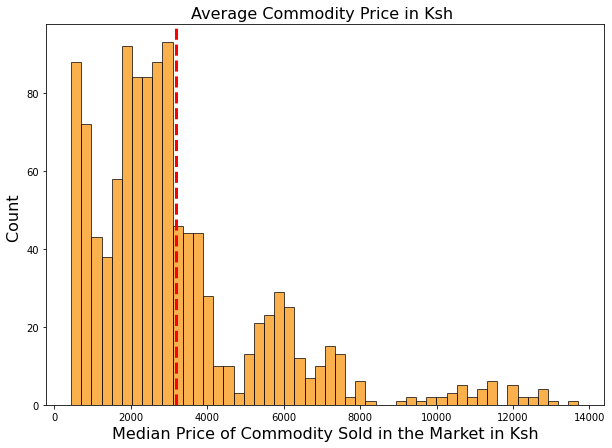

In [22]:
#The towers or bars of a histogram are called bins. 
#The height of each bin shows how many values from that data fall into that range
plt.figure(figsize=(10, 7))
plt.hist(data.Price, bins = 50, ec = 'black' ,color = '#f88f01',alpha=0.7)
plt.xlabel('Median Price of Commodity Sold in the Market in Ksh', fontsize=16)
plt.ylabel('Count ', fontsize=16)
plt.title('Average Commodity Price in Ksh ', fontsize=16)
plt.axvline(data['Price'].mean(), color='red', linestyle='dashed', linewidth=3, label='Average Price of Commodity Sold in the Market in Ksh')
plt.style.use('dark_background')
plt.show()


From the generated  histogram we see the variation of our prices and  looks like most of commodity prices range between 2500-3200ksh

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


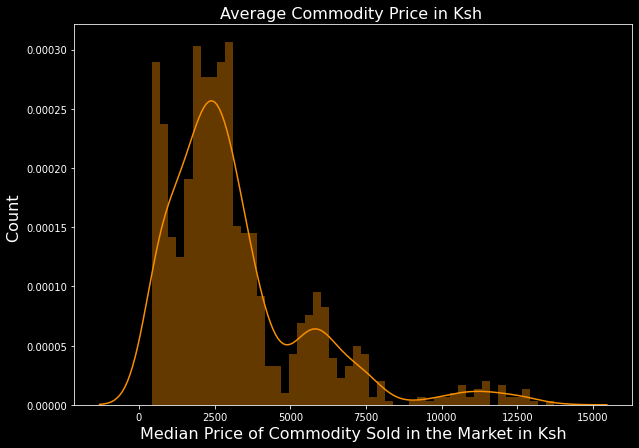

In [23]:
#generating a distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(data.Price, bins = 50 ,color = '#f88f01',hist=True)
plt.style.use('dark_background')
plt.xlabel('Median Price of Commodity Sold in the Market in Ksh', fontsize=16)
plt.ylabel('Count ', fontsize=16)
plt.title('Average Commodity Price in Ksh ', fontsize=16)
plt.show()

In [24]:
mean_price=data['Price'].mean()
median_price=data['Price'].median()
print('The mean commodity Price is Ksh',round(mean_price))
print('The median commodity Price is Ksh',median_price)

The mean commodity Price is Ksh 3188
The median commodity Price is Ksh 2610.0


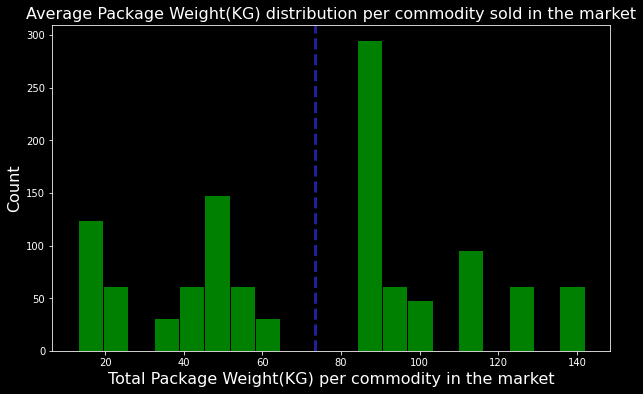

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(data['package_weight(Kg)'], bins=20, ec = 'black', color = 'green')
plt.xlabel('Total Package Weight(KG) per commodity in the market', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Average Package Weight(KG) distribution per commodity sold in the market', fontsize=16)
plt.axvline(data['package_weight(Kg)'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Households in a block')
plt.show()
plt.style.use('dark_background')

In [26]:
mean_pack_weight=data['package_weight(Kg)'].mean()
print('The mean package_weight in KG is:',mean_pack_weight)
mean_pack_median=data['package_weight(Kg)'].median()
print('The median package_weight in KG is:',mean_pack_median)

The mean package_weight in KG is: 73.37030567685589
The median package_weight in KG is: 90.0


Most of the commodities sold in the Market are packaged in weight of 90KG,50KG, 10KG respectively 

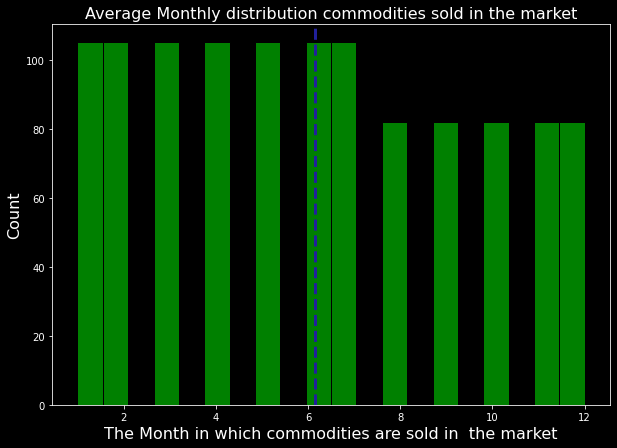

In [27]:
plt.figure(figsize=(10, 7))
plt.hist(data['Month'], bins=20, ec = 'black', color = 'green')
plt.xlabel('The Month in which commodities are sold in  the market', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Average Monthly distribution commodities sold in the market', fontsize=16)
plt.axvline(data['Month'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Monthly distribution commodities sold in the market')
plt.show()
plt.style.use('dark_background')

On average most of the commodities in the market are sold between the months of January and July followed later on by the months of August to December


<AxesSubplot:>

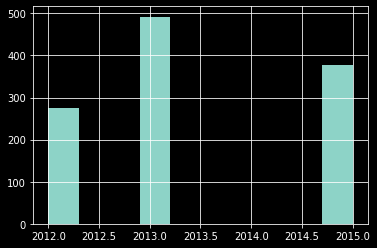

In [28]:
#Here 2013 was a good year in that most commodities were sold during this period second 2015 and 2012
data.Year.hist()

<AxesSubplot:>

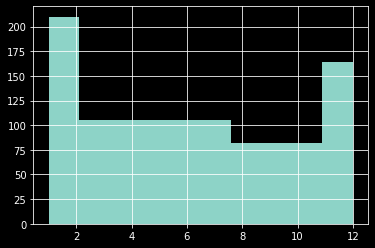

In [29]:
#January and December are the months were alot of commodities were sold 
data.Month.hist()

<AxesSubplot:>

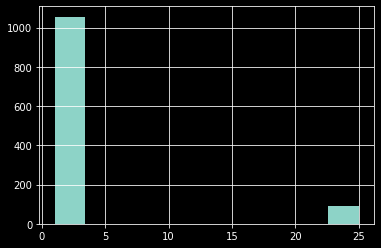

In [30]:
#Are of products are solds between the first 3-4 days of the month then few are sold during 23-25 days of the month
data.Day.hist()

In [31]:
#The total of diffrent produce variety sold for the said period
data['Produce_Variety'].value_counts()

Horticulture      713
Legumes           216
Cereals           120
Roots & Tubers     96
Name: Produce_Variety, dtype: int64

<AxesSubplot:>

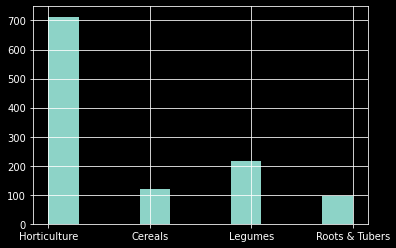

In [32]:
#From our histogram horticulture was the produced variety that was sold most
data.Produce_Variety.hist()

#### Correlation
    Correlation among attributes is an important parameter to know, 
    since variables that are highly correlated to each other or the target variable often add bias to linear models,
    providing false predictions.

In [33]:
#Finding the correlation between A produce variety with the comodity type with the month and year to price
data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr()

,produce_variety,Type_of_Commodity,Package_Type,package_weight(Kg),Day,Month,Year,Price
produce_variety,1.000000,-0.033852,-0.221569,0.205566,0.161232,0.034582,0.165628,0.292545
Type_of_Commodity,-0.033852,1.000000,0.117949,-0.055400,-0.006122,-0.001313,-0.006289,-0.172771
Package_Type,-0.221569,0.117949,1.000000,-0.555234,-0.155093,-0.033266,-0.159322,-0.411439
package_weight(Kg),0.205566,-0.055400,-0.555234,1.000000,0.160867,0.034504,0.165253,0.418381
Day,0.161232,-0.006122,-0.155093,0.160867,1.000000,0.330882,0.392926,0.259159
Month,0.034582,-0.001313,-0.033266,0.034504,0.330882,1.000000,-0.139098,0.045978
Year,0.165628,-0.006289,-0.159322,0.165253,0.392926,-0.139098,1.000000,0.299783
Price,0.292545,-0.172771,-0.411439,0.418381,0.259159,0.045978,0.299783,1.000000


<AxesSubplot:>

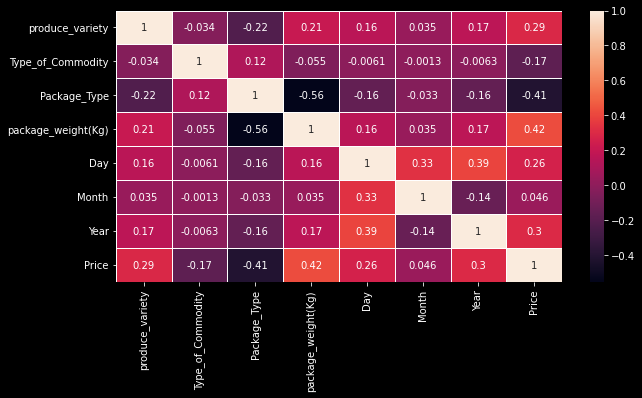

In [34]:
plt.figure(figsize=(10, 5))
#createing a color map
cmap = sns.diverging_palette(200,10, as_cmap=True)
#ploting a heatmap
#The lighter a particular box the greater the corrilation as per the key index
sns.heatmap(data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr(),annot=True, annot_kws={"size": 10},linewidths=.7)

    Noteable Corrilation findings
    
    a)There is some corrilation between produce_variety and price.
    
    b)Another higher correlation is found between the package_weight and the price
    
    c)The day in which a commodity is sold has a corrilation to the month
    
    d)The year and the day have a correlation to the price of the commodity
    (factoring may be the rainfall distribution of that year)
    




In [35]:
mask = np.zeros_like(data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

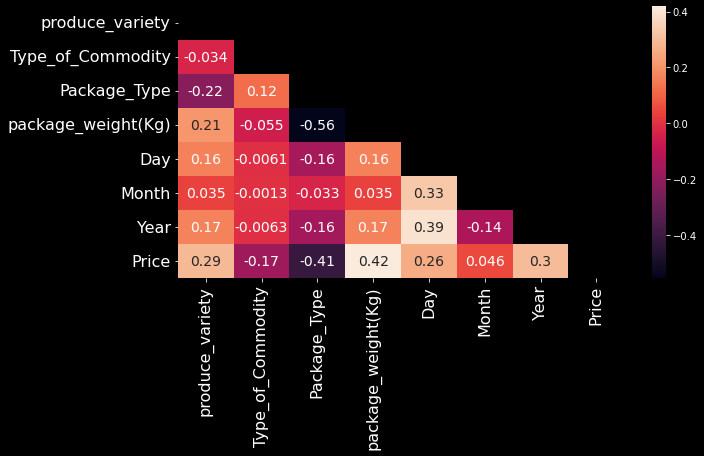

In [36]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.style.use('dark_background')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [37]:
data.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,produce_variety,Type_of_Commodity,Package_Type,package_weight(Kg),Day,Month,Year,Price
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012,1,5,2,126,1,1,2012,2205.0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012,1,11,4,22,1,1,2012,511.0
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012,1,34,4,14,1,1,2012,616.0
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012,1,7,2,138,1,1,2012,2833.0
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012,1,38,3,64,1,1,2012,3411.0


In [38]:
#Plotting bar graphs from the dataset categories
data_cat = data[['Produce_Variety', 'Commodity_Type', 'Unit','Volume_in_Kgs', 'Day', 'Month', 'Year']]

graph for Produce_Variety: total = 4


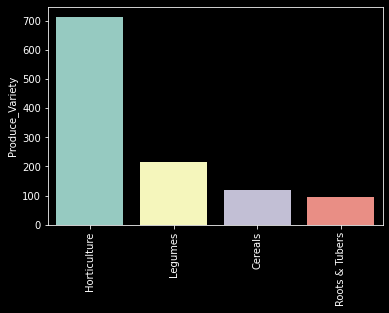

graph for Commodity_Type: total = 41


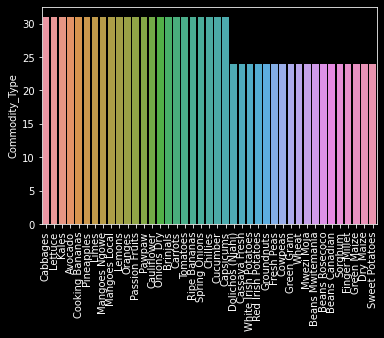

graph for Unit: total = 8


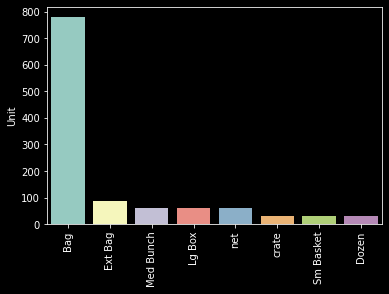

graph for Volume_in_Kgs: total = 22


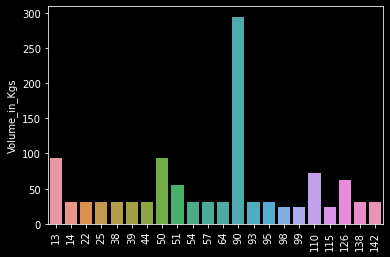

graph for Day: total = 2


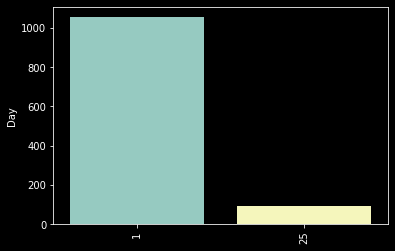

graph for Month: total = 12


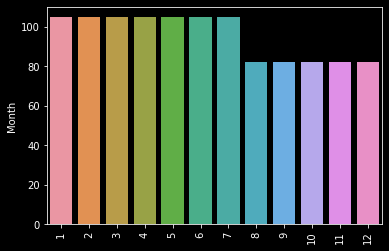

graph for Year: total = 3


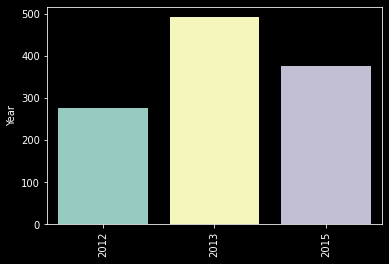

In [39]:
for i in data_cat.columns:
    cat_num = data_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [40]:
#Creating a Word Map

In [41]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

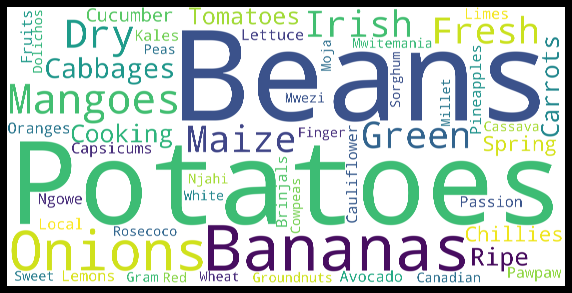

In [42]:
text=" ".join(data['Commodity_Type'])
word_cloud = WordCloud(collocations = False, background_color = 'white',scale=20,max_words = 1000,width =1000, height = 500).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.show()
#saving the word cloud and storing it as png

# store to file
word_cloud.to_file("commodity_types.png")


In [43]:
#Save our dataset having cleaned it and analysed as EDA
data.to_csv('Food_Crops(EDA_cleaned).csv')

### Building Our Model
    The steps to follow are 
    1)Define the ML model to use
    2)Fit the model
    3)Use the model to Predict values
    4)Evaluate the model to see it's performance

#### Linear Regression Model
Linear regression tries to establish a linear relationship between an independent variable x and a dependent variable y.
It assumes a linear relationship between input variables (x) and output variables (y).

Linear regression tends to establish a relationship between them by formulating an equation that describes the outcome (y) as a linear combination of the input variables (multiplied with the corresponding variables learned by the model from training).

"If the predictor variable is represented by x, and the outcome variable is represented by y in our case crop prices, then the
relationship can be expressed by the equation 
                        
                        y=β0 + β1x

where β1 represents the slope of the x, and β0 is the intercept or error term for the equation.
What linear regression does is estimate the values of β0 and β1 from a set of observed data
points, where the values of x, and associated values of y, are provided. So, when a new or
previously unobserved data point comes where the value of y is unknown, it can fit the
values of x, β0, and β1 into the above equation to predict the value of y."- Shah C (Hands on introduction to Data Science)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [45]:
#load our cleaned data 
data=pd.read_csv('Prices for Food Crops_Commodities_2012_to_2015 (EDA_cleaned).csv')


In [46]:
#choose relevant  columns
data_model=data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']]


In [47]:
#get dummy data
data_dum=pd.get_dummies(data_model)

### Training Test Split

In [48]:
#categorising our data into X feaures and Y target values

X=data_dum.drop('Price',axis=1)
y=data_dum['Price']

In [49]:
#spliting our data into traning and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#### Model Definition

       #Notes Source https://machinelearningmastery.com/regression-metrics-for-machine-learning/
     Regression predictive modeling are those problems that involve predicting a numeric value.
     Metrics for regression involve calculating an error score to summarize the predictive skill of a model.
    
    Accuracy (e.g. classification accuracy) is a measure for classification, not regression.
    We cannot calculate accuracy for a regression model.

    The skill or performance of a regression model must be reported as an error in those predictions.
    If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted           the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions         were to the expected values.

In [50]:
#Linear Regression
model=LinearRegression()


#### Model Training

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
print(model.intercept_)

-682350.3010270083


### Preditiction

In [53]:
test_pred=model.predict(X_test)
test_train=model.predict(X_train)


(array([  2.,   7.,   2.,   6.,  20.,  59.,  92., 118.,  33.,   5.]),
 array([-8782.52857517, -7453.77929497, -6125.03001477, -4796.28073456,
        -3467.53145436, -2138.78217415,  -810.03289395,   518.71638625,
         1847.46566646,  3176.21494666,  4504.96422687]),
 <BarContainer object of 10 artists>)

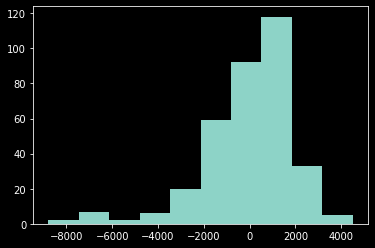

In [54]:
#This will show how far off the values are. This is showing the predicted value minus the actual test value for all the data points.

residuals=test_pred-y_test
residuals
#Then, we should plot with a histogram to see how “off” each value is. This can be done with the following command.
#This graph above shows the distribution of error. Most of the time, it appears that the values are close-ish to 0.
plt.hist(residuals)

    There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model;       they are:
    1)Mean Absolute Error (MAE)
    2)Mean Squared Error (MSE)
    3)Root Mean Squared Error (RMSE)        

### Model Evaluation

In [55]:
#calculating the mean absolute error on training data
mae= metrics.mean_absolute_error(y_train,test_train)
#calculating the mean squared error on training data
mse= metrics.mean_squared_error(y_train, test_train)
#calculating the root mean squared error on training data
rmse = np.sqrt(metrics.mean_squared_error(y_train,test_train))
print("Trainig Data")
print("The mean absolute error using Linear Regression is :", mae)
print("The mean squared error using Linear Regression is  :", mse)
print("The root mean squared error using Linear Regression is :", rmse)

Trainig Data
The mean absolute error using Linear Regression is : 1411.3523033926485
The mean squared error using Linear Regression is  : 3787744.1485906183
The root mean squared error using Linear Regression is : 1946.2127706370181


In [56]:
#calculating the mean absolute error on testing data
mae= metrics.mean_absolute_error(y_test,test_pred)
#calculating the mean squared error on testing data
mse= metrics.mean_squared_error(y_test, test_pred)
#calculating the root  mean squared error on testing data
rmse = np.sqrt(metrics.mean_squared_error(y_test,test_pred))

print("Testing Data")
print("The mean absolute error using Linear Regression is :", mae)
print("The mean squared error using Linear Regression is :", mse)
print("The root mean squared error using Linear Regression is :", rmse)

Testing Data
The mean absolute error using Linear Regression is : 1470.0507381358198
The mean squared error using Linear Regression is : 3999426.048854293
The root mean squared error using Linear Regression is : 1999.8565070660177


In [57]:
#Co-efficient of determination (R2 Score) on training data
metrics.r2_score(y_train,test_train)

0.3340038768030956

In [58]:
from sklearn.metrics import r2_score
#Co-efficient of determination (R2 Score) on testing data
metrics.r2_score(y_test,test_pred)

0.2753566258599899

    We find that our Linear regression model has an accuracy of around 25%

    Linear regression can be prone to underfitting the data.
    Hence if you build a model using linear regression and you find that
    both the test accuracy and the training accuracy are low then this would likely be due to underfitting.
    
    To address this som eof the other models we can use include:
    A)Decision tree regression
    B)Random forest regression

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


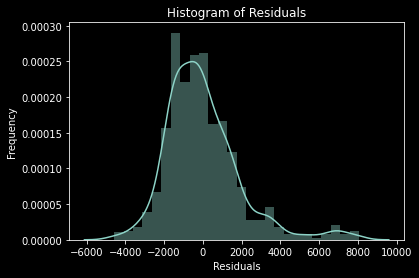

In [59]:
# Checking Normality of errors
sns.distplot(y_train-test_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


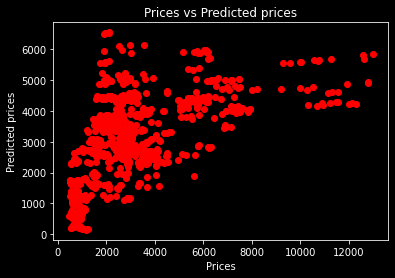

In [60]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, test_train,color='red')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


In [61]:
print('Intercept', model.intercept_)
pd.DataFrame(data = model.coef_, index=X_train.columns, columns = ['Coef'])

Intercept -682350.3010270083


,Coef
produce_variety,591.207056
Type_of_Commodity,-22.252499
Package_Type,-211.627038
package_weight(Kg),15.169876
Day,35.167697
Month,15.049833
Year,339.818464


### Regression using Log Prices

In [62]:
X=data_dum.drop('Price',axis=1)
y=np.log(data_dum['Price'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [63]:
model=LinearRegression(normalize=True)
model.fit(X_train, y_train)

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [64]:
pred_score=model.predict(X_test)
train_score=model.predict(X_train)

In [65]:
metrics.r2_score(y_train,train_score)

0.5073404805332139

In [66]:
metrics.r2_score(y_test,pred_score)

0.42880707675239393

We find that our model has an accuracy of around 43% with use of log prices in our regression

### Decision Tree Regression
    •	When a decision tree classifies things into categories it’s called a classification tree. (Outcome of the data is discrete or its categorical) e.g., presence or absence of students, person died or survived. 
    •	When a decision tree predicts numerical values it’s a regression tree. (Outcome of the data is continuous in nature) e.g., house prices, age of a person, length of stay in hotel.
    
       Decision trees learn by splitting the training examples in a way such that the sum of squared residuals is minimized. 
       It then predicts the output value by taking the average of all of the examples that fall into a certain leaf on the              decision tree and using that as the output prediction
       
       Worth noting is that decision trees are prone to overting hence to resolve this Random Forest Regression helps to reduce 
       overfitting by  aggregating the results of multiple decision trees on the same dataset.


In [67]:
from sklearn.tree import DecisionTreeRegressor


X=data_dum.drop('Price',axis=1)
y=data_dum['Price']
train_x,val_x,train_y,val_y = train_test_split(X,y,random_state=0)


### Define our Model

In [68]:
ml_model = DecisionTreeRegressor(max_depth=2)

### Fit our Model  

In [69]:
ml_model.fit(X,y)

DecisionTreeRegressor(max_depth=2)

### Predict our Model

In [70]:
dt_pred=ml_model.predict(val_x)

### Evaluate our Model

In [71]:
metrics.mean_absolute_error(val_y,dt_pred)

975.359174449879

In [72]:
ml_model.score(train_x,train_y)

0.6416561124580894

In [73]:
ml_model.score(val_x,val_y)

0.6256173358877914

In [74]:
#calculating the mean absolute error across our testing data
def get_mae(leaf_nodes,train_x,val_x,train_y,val_y):
    ml_model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes,random_state=0)
    ml_model.fit(X,y)
    a = ml_model.predict(val_x)
    mae = metrics.mean_absolute_error(val_y,a)
    return(mae)

In [75]:
#sample of mean absolute errors obtain with our decision tree model
for leaf_nodes in np.arange(10,300,50):
    mae = get_mae(leaf_nodes,train_x,val_x,train_y,val_y)
    print(leaf_nodes,"  >>>>>>>>>>  ",mae)

10   >>>>>>>>>>   564.0226707872703
60   >>>>>>>>>>   251.68842516399346
110   >>>>>>>>>>   198.1707185332482
160   >>>>>>>>>>   153.11928576992102
210   >>>>>>>>>>   134.7496446206616
260   >>>>>>>>>>   110.6652911913801


### Generating our decision tree image

In [76]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
labels = X.columns
graph = Source(tree.export_graphviz(ml_model ,feature_names = labels, max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Buidling A Random Forest Regression

In [77]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler

In [78]:
#defining our training data
X_data=data_dum.drop('Price',axis=1)
y_data=data_dum.Price
#Creating our training and test dataset
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=42)

### Define our Model

In [79]:
regressor=RandomForestRegressor(n_estimators=1000)

### Fitting our model


In [80]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

### Prediction

In [81]:
pred=model.predict(X_test)
train=model.predict(X_train)

### Random Forest Evaluation

In [82]:
print('\nMetrics on Training Data Random Forest Regression\n ')
print('MAE:', metrics.mean_absolute_error(y_train, train))
print('MSE:', metrics.mean_squared_error(y_train, train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,train)))



print('\nMetrics on Testing Data Random Forest Regression\n')
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))





Metrics on Training Data Random Forest Regression
 
MAE: 3189.6001456082436
MSE: 15738418.820858497
RMSE: 3967.167606852337

Metrics on Testing Data Random Forest Regression

MAE: 3159.510500323896
MSE: 15799705.792733997
RMSE: 3974.884374762868


In [83]:
#model score on training data
regressor.score(X_train,y_train)


0.9906660244370808

In [84]:
#model score on test data
regressor.score(X_test,y_test)

0.9727341135307832

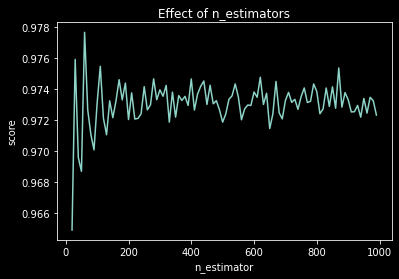

In [85]:
estimators = np.arange(20, 1000, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

Trying our algorithm accross different estimated values and we see the score maintained  ranges around 97% 

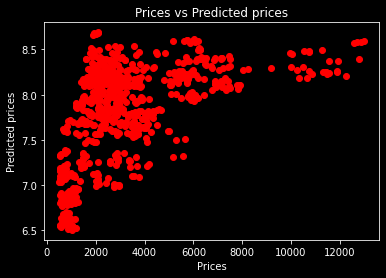

In [86]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, train,color='red')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()



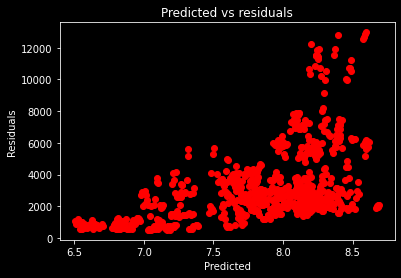

In [87]:
# Checking residuals
plt.scatter(train, y_train-train,color='red')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


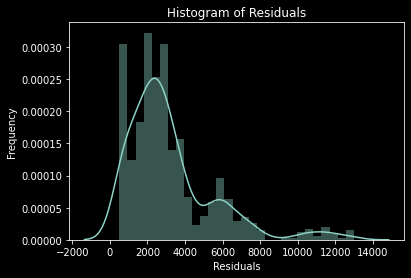

In [88]:
# Checking Normality of errors
sns.distplot(y_train-train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
#There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

    We find that our model has an improved accuracy of around 97% with use of Random Forest Regression.
    
    Random forest works by  builds multiple decision trees and merges them together.
    Often it's more accurate and stable in prediction 
    Random decision forests correct the decision tree’s habit of overfitting to their training set.
